In [2]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy import stats
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn

In [47]:
df = pd.read_csv('/Users/ezzan/Downloads/ESSdata_Thinkful.csv')
means = df.groupby(["cntry"])["ppltrst"].mean()
means
df = df.dropna(how='all')

In this dataset, the same participants answered questions in 2012 and again 2014.







### Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [48]:
df2012 = df[df['year'] == 6]
df2014 = df[df['year'] == 7]

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


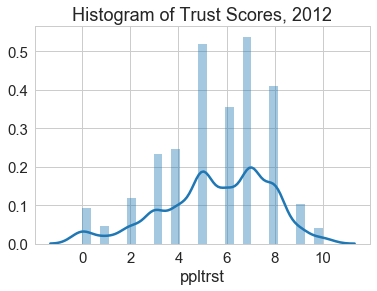

In [49]:
plt.title('Histogram of Trust Scores, 2012')
df2012 = df2012.dropna()
sns.distplot(df2012['ppltrst'])
plt.show()

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


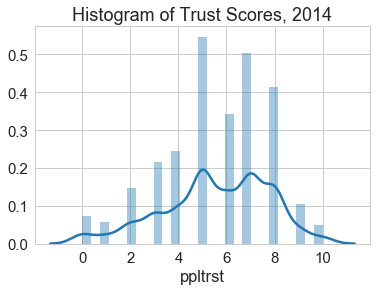

In [50]:

plt.title('Histogram of Trust Scores, 2014')
df2014 = df2014.dropna()
sns.distplot(df2014['ppltrst'])
df.cntry = df.cntry.dropna()
plt.show()

People's trust 2012 ppltrst    5.677878
dtype: float64
People's trust 2014 ppltrst    5.751617
dtype: float64
Ttest_relResult(statistic=array([-0.65868518]), pvalue=array([0.51029435]))


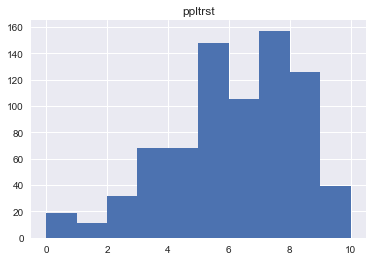

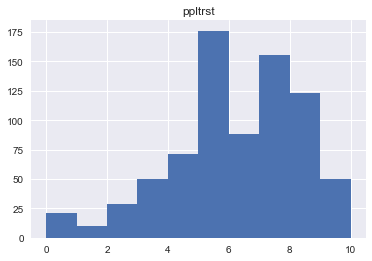

In [154]:
dfCH12 = df[(df.year == 6) & (df.cntry=='CH')][["ppltrst"]].hist()
dfCH14 = df[(df.year == 7) & (df.cntry=='CH')][["ppltrst"]].hist()
print("People's trust 2012", df[(df.year == 6) & (df.cntry=='CH')][["ppltrst"]].mean())
print("People's trust 2014", df[(df.year == 7) & (df.cntry=='CH')][["ppltrst"]].mean())
print(stats.ttest_rel(df[(df.year == 6) & (df.cntry=='CH')][["ppltrst"]],df[(df.year == 7) & (df.cntry=='CH')][["ppltrst"]])
)

ppltrst    6.649315
dtype: float64
ppltrst    6.59863
dtype: float64
Ttest_relResult(statistic=masked_array(data=[0.5073077081124404],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=0.61209257,
             mask=False,
       fill_value=1e+20))


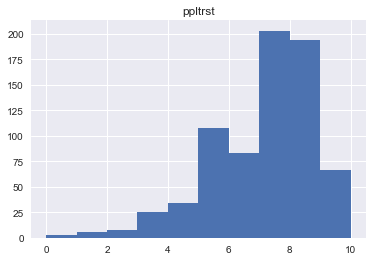

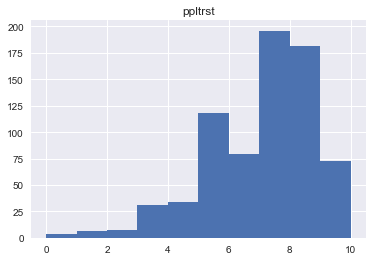

In [155]:
dfNO12 = df[(df.year == 6) & (df.cntry=='NO')][["ppltrst"]].hist()
dfNO14 = df[(df.year == 7) & (df.cntry=='NO')][["ppltrst"]].hist()
print(df[(df.year == 6) & (df.cntry=='NO')][["ppltrst"]].mean())
print(df[(df.year == 7) & (df.cntry=='NO')][["ppltrst"]].mean())
print(stats.ttest_rel(df[(df.year == 6) & (df.cntry=='NO')][["ppltrst"]],df[(df.year == 7) & (df.cntry=='NO')][["ppltrst"]], nan_policy='omit'))

Average Year 2012 ppltrst    6.058499
dtype: float64
Average Year 2014 ppltrst    6.257709
dtype: float64
Ttest_relResult(statistic=masked_array(data=[-2.0671082026033982],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=0.03900782,
             mask=False,
       fill_value=1e+20))


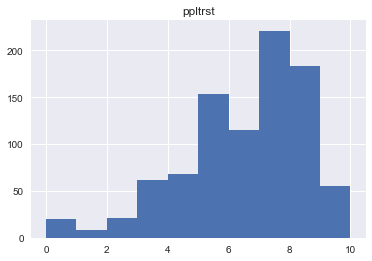

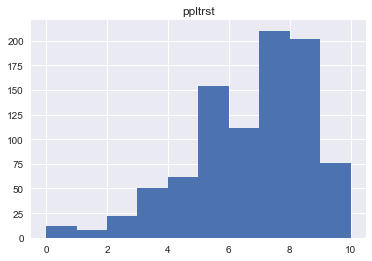

In [158]:
df[(df.year == 6) & (df.cntry=='SE')][["ppltrst"]].hist()
df[(df.year == 7) & (df.cntry=='SE')][["ppltrst"]].hist()

print("Average Year 2012", df[(df.year == 6) & (df.cntry=='SE')][["ppltrst"]].mean())
print("Average Year 2014", df[(df.year == 7) & (df.cntry=='SE')][["ppltrst"]].mean())
print(stats.ttest_rel(df[(df.year == 6) & (df.cntry=='SE')][["ppltrst"]],df[(df.year == 7) & (df.cntry=='SE')][["ppltrst"]], nan_policy='omit'))

Average year 2012 ppltrst    5.214286
dtype: float64
Average yeat 2014 ppltrst    5.357143
dtype: float64
Ttest_relResult(statistic=array([-0.18399502]), pvalue=array([0.85685638]))


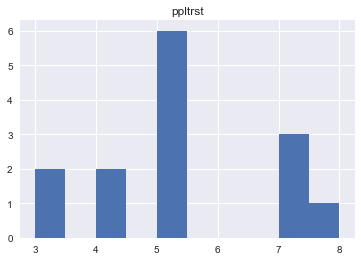

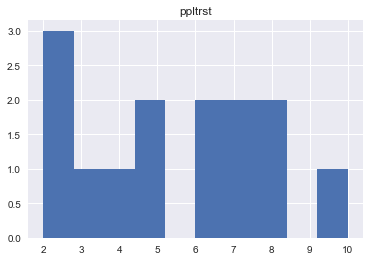

In [160]:
df[(df.year == 6) & (df.cntry=='DE')][["ppltrst"]].hist()
df[(df.year == 7) & (df.cntry=='DE')][["ppltrst"]].hist()
print("Average year 2012", df[(df.year == 6) & (df.cntry=='DE')][["ppltrst"]].mean())
print("Average yeat 2014", df[(df.year == 7) & (df.cntry=='DE')][["ppltrst"]].mean())
print(stats.ttest_rel(df[(df.year == 6) & (df.cntry=='DE')][["ppltrst"]],df[(df.year == 7) & (df.cntry=='DE')][["ppltrst"]], nan_policy='omit'))

ppltrst    5.114592
dtype: float64
ppltrst    4.895128
dtype: float64
Ttest_relResult(statistic=masked_array(data=[2.4561906976601646],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=0.01418158,
             mask=False,
       fill_value=1e+20))


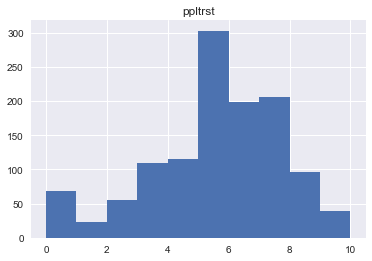

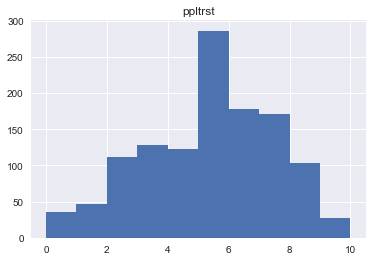

In [161]:
df[(df.year == 6) & (df.cntry=='ES')][["ppltrst"]].hist()
df[(df.year == 7) & (df.cntry=='ES')][["ppltrst"]].hist()
print(df[(df.year == 6) & (df.cntry=='ES')][["ppltrst"]].mean())
print(df[(df.year == 7) & (df.cntry=='ES')][["ppltrst"]].mean())
print(stats.ttest_rel(df[(df.year == 6) & (df.cntry=='ES')][["ppltrst"]],df[(df.year == 7) & (df.cntry=='ES')][["ppltrst"]], nan_policy='omit'))

### Question 2 Did people become happier from 2012 to 2014? Compute results for each country in the sample.


happy    8.088312
dtype: float64
happy    8.116429
dtype: float64


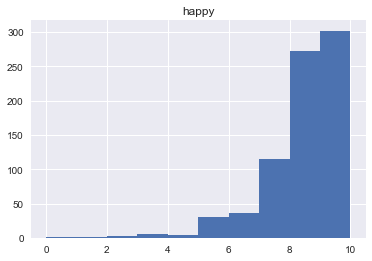

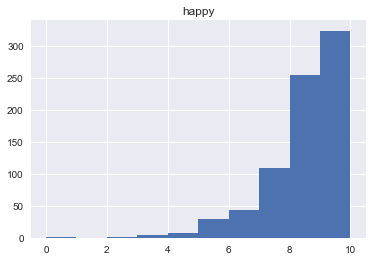

In [145]:
df[(df.year == 6) & (df.cntry=='CH')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='CH')][["happy"]].hist()
print(df[(df.year == 6) & (df.cntry=='CH')][["happy"]].mean())
print(df[(df.year == 7) & (df.cntry=='CH')][["happy"]].mean())

In [146]:
stats.ttest_rel(df[(df.year == 6) & (df.cntry=='CH')][["happy"]],df[(df.year == 7) & (df.cntry=='CH')][["happy"]], nan_policy='omit')

Ttest_relResult(statistic=masked_array(data=[-0.319412957862232],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=0.74950014,
             mask=False,
       fill_value=1e+20))

happy    8.251719
dtype: float64
happy    7.915185
dtype: float64


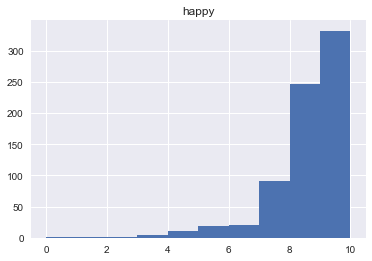

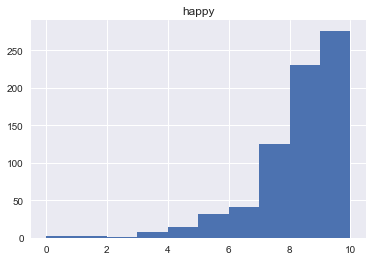

In [147]:
df[(df.year == 6) & (df.cntry=='NO')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='NO')][["happy"]].hist()
print(df[(df.year == 6) & (df.cntry=='NO')][["happy"]].mean())
print(df[(df.year == 7) & (df.cntry=='NO')][["happy"]].mean())

In [98]:
stats.ttest_rel(df[(df.year == 6) & (df.cntry=='NO')][["happy"]],df[(df.year == 7) & (df.cntry=='NO')][["happy"]], nan_policy='omit')

Ttest_relResult(statistic=masked_array(data=[4.2856826576235925],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=2.06745301e-05,
             mask=False,
       fill_value=1e+20))

happy    7.428571
dtype: float64
happy    7.857143
dtype: float64


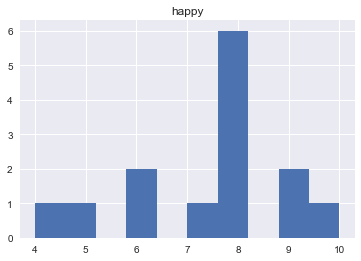

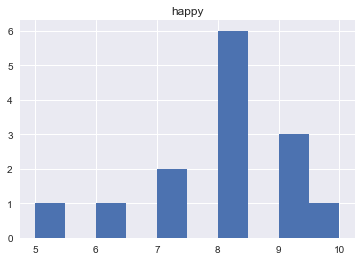

In [148]:
df[(df.year == 6) & (df.cntry=='DE')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='DE')][["happy"]].hist()
print(df[(df.year == 6) & (df.cntry=='DE')][["happy"]].mean())
print(df[(df.year == 7) & (df.cntry=='DE')][["happy"]].mean())

In [99]:
stats.ttest_rel(df[(df.year == 6) & (df.cntry=='DE')][["happy"]],df[(df.year == 7) & (df.cntry=='DE')][["happy"]], nan_policy='omit')

Ttest_relResult(statistic=array([-0.80622577]), pvalue=array([0.43461387]))

happy    7.907387
dtype: float64
happy    7.946961
dtype: float64


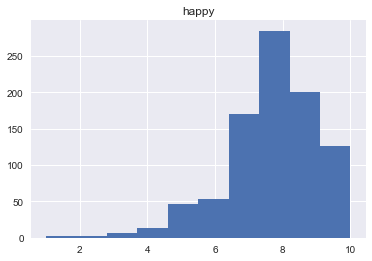

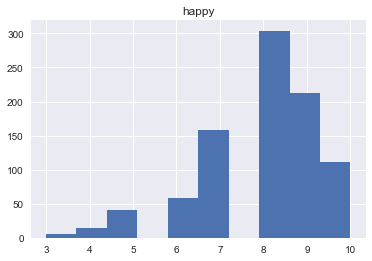

In [149]:
df[(df.year == 6) & (df.cntry=='SE')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='SE')][["happy"]].hist()
print(df[(df.year == 6) & (df.cntry=='SE')][["happy"]].mean())
print(df[(df.year == 7) & (df.cntry=='SE')][["happy"]].mean())

In [100]:
stats.ttest_rel(df[(df.year == 6) & (df.cntry=='SE')][["happy"]],df[(df.year == 7) & (df.cntry=='SE')][["happy"]], nan_policy='omit')

Ttest_relResult(statistic=masked_array(data=[-0.5581637086030012],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=0.57687096,
             mask=False,
       fill_value=1e+20))

happy    7.54868
dtype: float64
happy    7.419967
dtype: float64


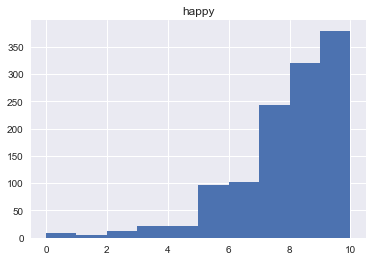

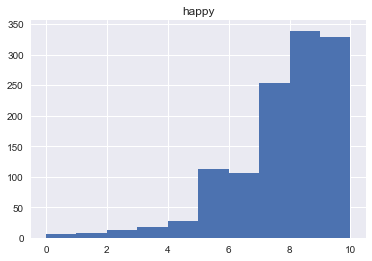

In [150]:
df[(df.year == 6) & (df.cntry=='ES')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='ES')][["happy"]].hist()
print(df[(df.year == 6) & (df.cntry=='ES')][["happy"]].mean())
print(df[(df.year == 7) & (df.cntry=='ES')][["happy"]].mean())

In [101]:
stats.ttest_rel(df[(df.year == 6) & (df.cntry=='ES')][["happy"]],df[(df.year == 7) & (df.cntry=='ES')][["happy"]], nan_policy='omit')

Ttest_relResult(statistic=masked_array(data=[1.613832417735418],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=0.10682452,
             mask=False,
       fill_value=1e+20))

### Question 3: Who reported watching more TV in 2012, men or women?

happy    8.088312
dtype: float64
idno       34458.267841
year           6.500927
tvtot          3.825603
ppltrst        5.628565
pplfair        5.958343
pplhlp         5.233682
happy          7.729786
sclmeet        5.178613
sclact         2.780905
gndr           1.000000
agea          46.973037
partner        1.364354
dtype: float64
idno       44786.048500
year           6.497891
tvtot          3.892589
ppltrst        5.490251
pplfair        6.053202
pplhlp         5.406206
happy          7.660391
sclmeet        5.210427
sclact         2.716584
gndr           2.000000
agea          47.922966
partner        1.404180
dtype: float64


Text(0.5,1,'TV Total (2012)')

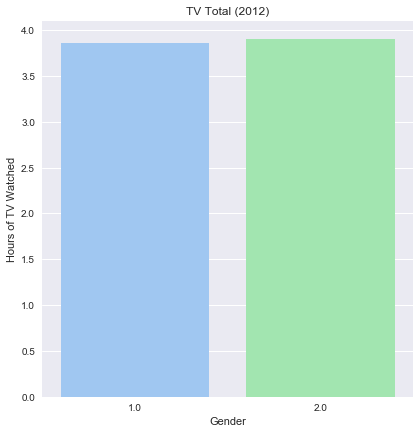

In [152]:
m2012 = df[df['gndr'] == 1]
f2012 = df[df['gndr'] == 2]
print(df[(df.year == 6) & (df.cntry=='CH')][["happy"]].mean())
print(m2012.mean())
print(f2012.mean())
sns.set(style="darkgrid")

g = sns.factorplot(x="gndr", y="tvtot", data = df2012,
                   size=6, kind="bar", palette="pastel", ci=None)
g.despine(left=True)
g.set_ylabels("Hours of TV Watched")
g.set_xlabels("Gender")
plt.title('TV Total (2012)')

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


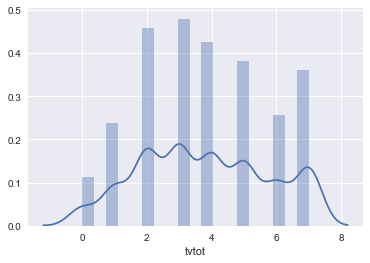

In [72]:
m2012 = m2012.dropna()
sns.distplot(m2012['tvtot'])

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


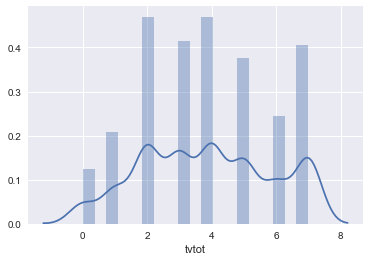

In [73]:
f2012 = f2012.dropna()
sns.distplot(f2012['tvtot'])

In [74]:
stats.kruskal(
     m2012['tvtot'],
     f2012['tvtot'])

KruskalResult(statistic=2.7294759657508987, pvalue=0.0985116036112953)

### Question 4:  Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


In [75]:
part2012 = df2012[df2012['partner'] == 1]
sing2012 = df2012[df2012['partner'] == 2]
part2012 = part2012.dropna()
sing2012 = sing2012.dropna()

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


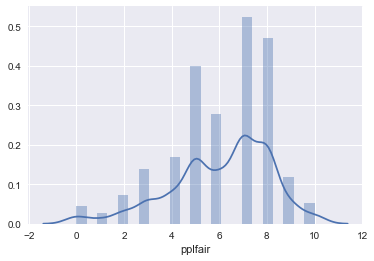

In [76]:
sns.distplot(part2012['pplfair'])

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


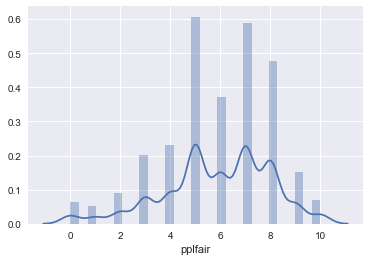

In [77]:
sns.distplot(sing2012['pplfair'])

In [121]:
print("Avg. score of whether people were fair (reported by those with partners):", part2012.pplfair.mean())
print("Avg. score of whether people were fair (reported by single people):", sing2012.pplfair.mean())

Avg. score of whether people were fair (reported by those with partners): 6.0743509047993705
Avg. score of whether people were fair (reported by single people): 5.86592544146501


In [109]:
stats.mannwhitneyu(part2012['pplfair'], sing2012['pplfair'], use_continuity=True)

MannwhitneyuResult(statistic=1819821.5, pvalue=0.00028258143613772957)

### Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

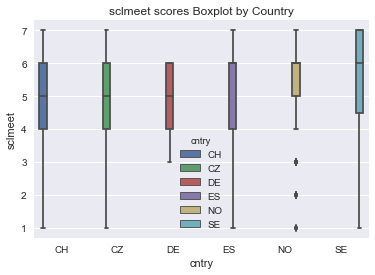

In [79]:
ax = sns.boxplot(x="cntry", y="sclmeet", hue="cntry", data=df2012) 
plt.title("sclmeet scores Boxplot by Country")
plt.show()

In [80]:
den = df2014[df2014['cntry'] == 'DE']
swed= df2014[df2014['cntry'] == 'SE']
swed12 = df2012[df2012['cntry'] == 'SE']
norway = df2014[df2014['cntry'] == 'NO']
estonia = df2014[df2014['cntry'] == 'ES']
czech = df2014[df2014['cntry'] == 'CH']

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


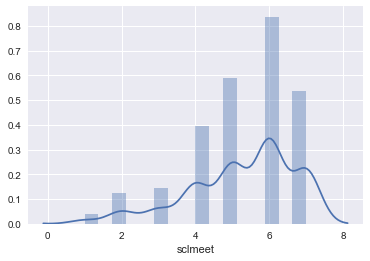

In [81]:
sns.distplot(estonia['sclmeet'])

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


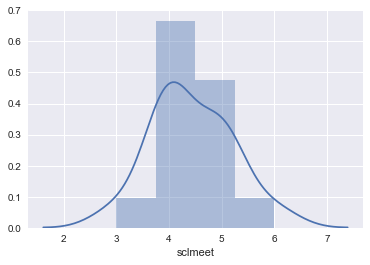

In [82]:
sns.distplot(den['sclmeet'])

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


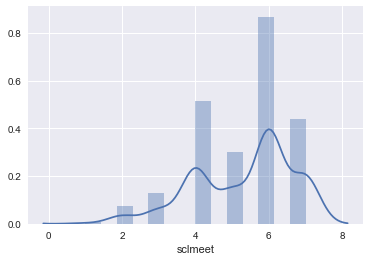

In [83]:
sns.distplot(norway['sclmeet'])

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


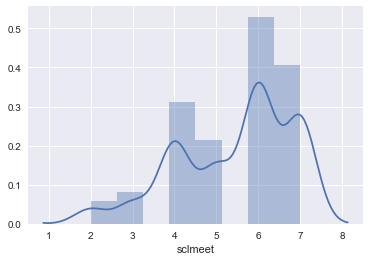

In [84]:
sns.distplot(swed['sclmeet'])

In [134]:
print(stats.ttest_ind(swed['sclmeet'].dropna(), norway['sclmeet'].dropna()))
print(stats.ttest_ind(swed['sclmeet'].dropna(), den['sclmeet'].dropna()))
print(stats.ttest_ind(norway['sclmeet'].dropna(), den['sclmeet'].dropna()))

Ttest_indResult(statistic=1.8108243825311887, pvalue=0.07035826286442122)
Ttest_indResult(statistic=2.739042801007487, pvalue=0.006286550691196736)
Ttest_indResult(statistic=2.4461487954484564, pvalue=0.014676088277028506)


### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

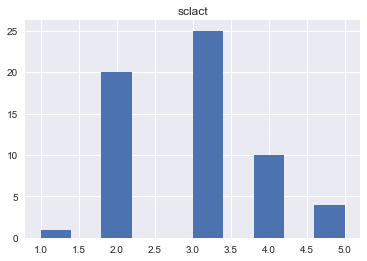

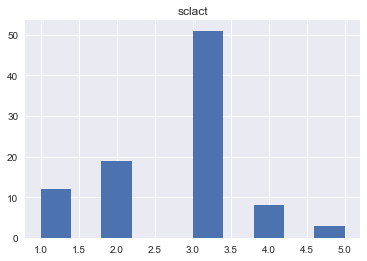

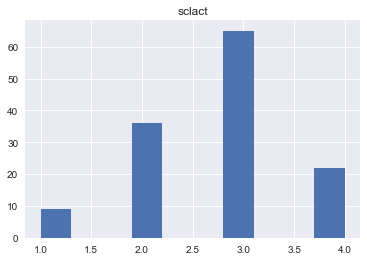

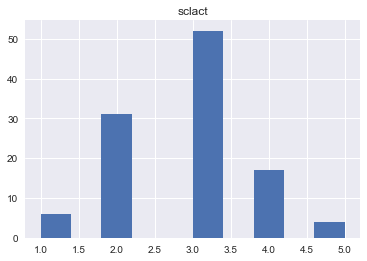

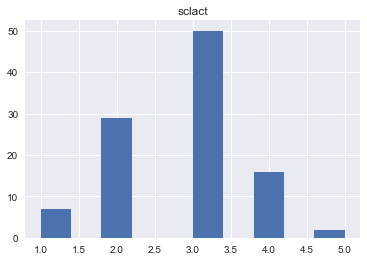

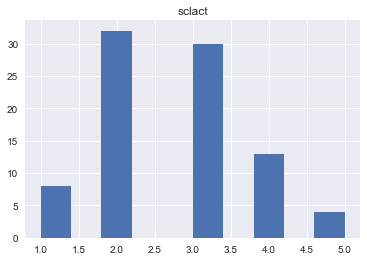

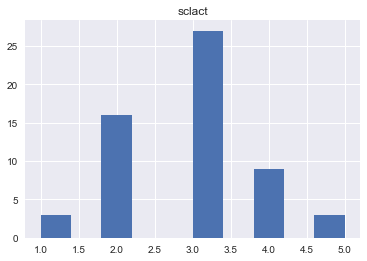

In [105]:

ch20 = df[(df.year == 7) & (df.cntry=='CH')& (df.agea < 20)][["sclact"]].hist()
ch30 = df[(df.year == 7) & (df.cntry=='CH')& (df.agea > 20) & (df.agea < 30)][["sclact"]].hist()
ch40 = df[(df.year == 7) & (df.cntry=='CH')& (df.agea > 30) & (df.agea < 40)][["sclact"]].hist()
ch50 = df[(df.year == 7) & (df.cntry=='CH')& (df.agea > 40) & (df.agea < 50)][["sclact"]].hist()
ch60 = df[(df.year == 7) & (df.cntry=='CH')& (df.agea > 50) & (df.agea < 60)][["sclact"]].hist()
ch70 = df[(df.year == 7) & (df.cntry=='CH')& (df.agea > 60) & (df.agea < 70)][["sclact"]].hist()
ch80 = df[(df.year == 7) & (df.cntry=='CH')& (df.agea > 70) & (df.agea < 80)][["sclact"]].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FAB013C18>]],
      dtype=object)

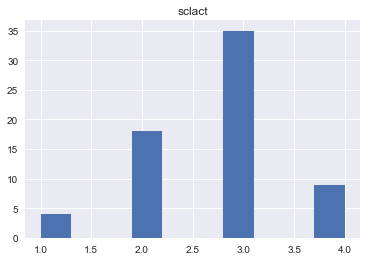

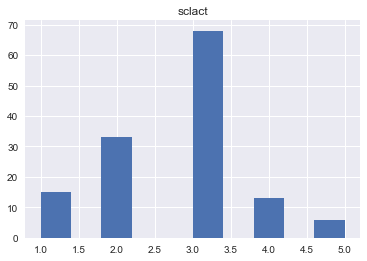

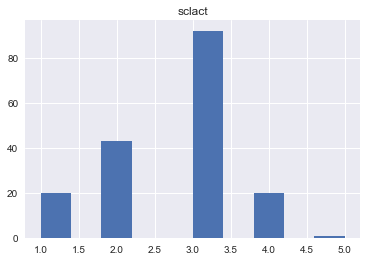

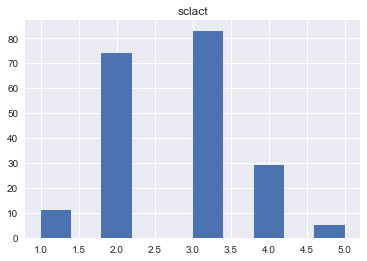

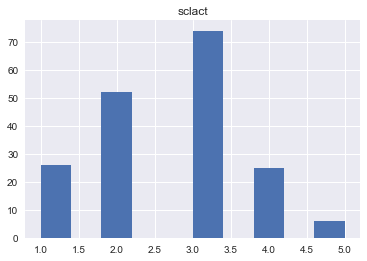

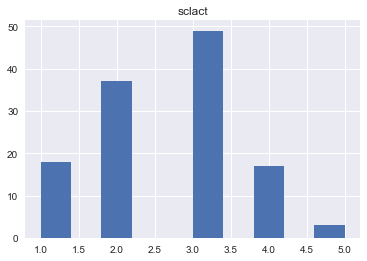

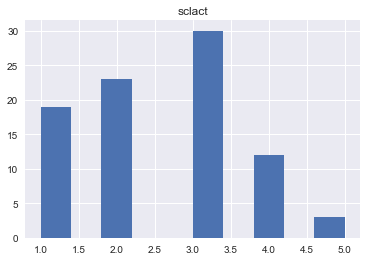

In [86]:

df[(df.year == 7) & (df.cntry=='ES')& (df.agea < 20)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='ES')& (df.agea > 20) & (df.agea < 30)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='ES')& (df.agea > 30) & (df.agea < 40)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='ES')& (df.agea > 40) & (df.agea < 50)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='ES')& (df.agea > 50) & (df.agea < 60)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='ES')& (df.agea > 60) & (df.agea < 70)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='ES')& (df.agea > 70) & (df.agea < 80)][["sclact"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FAC519358>]],
      dtype=object)

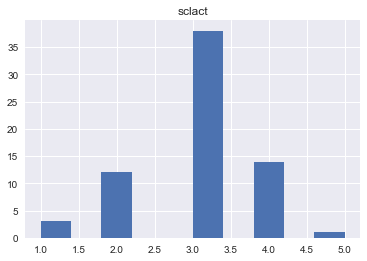

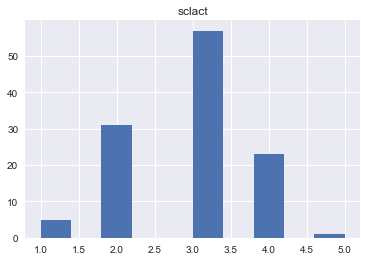

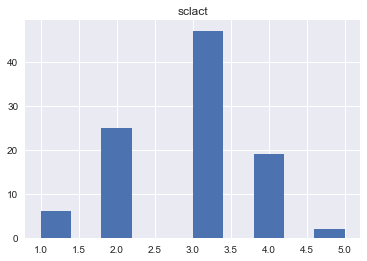

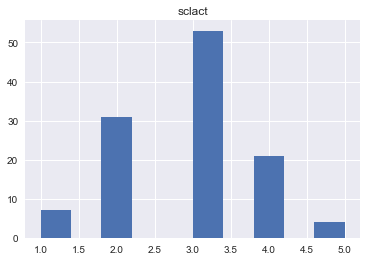

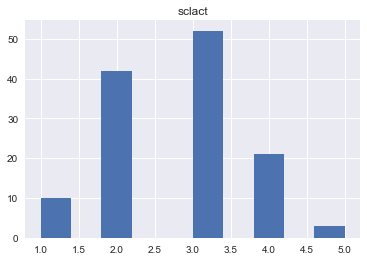

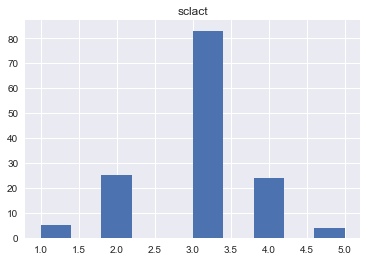

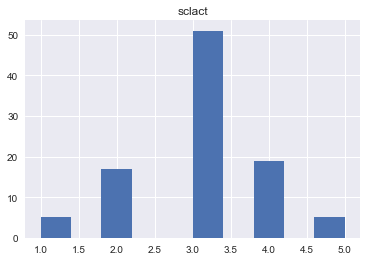

In [87]:

df[(df.year == 7) & (df.cntry=='SE')& (df.agea < 20)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='SE')& (df.agea > 20) & (df.agea < 30)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='SE')& (df.agea > 30) & (df.agea < 40)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='SE')& (df.agea > 40) & (df.agea < 50)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='SE')& (df.agea > 50) & (df.agea < 60)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='SE')& (df.agea > 60) & (df.agea < 70)][["sclact"]].hist()
df[(df.year == 7) & (df.cntry=='SE')& (df.agea > 70) & (df.agea < 80)][["sclact"]].hist()

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.


C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


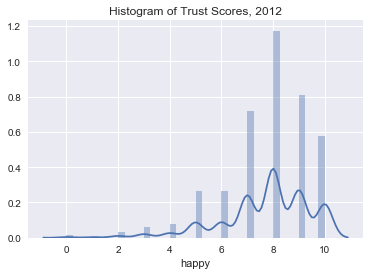

In [102]:
plt.title('Histogram of Trust Scores, 2012')
df2012 = df2012.dropna()
sns.distplot(df2012['happy'])
plt.show()

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


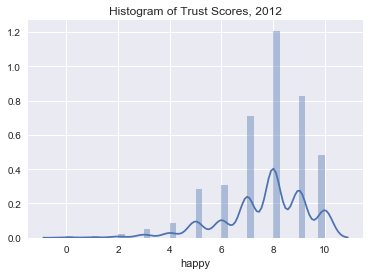

In [103]:
plt.title('Histogram of Trust Scores, 2012')
df2014 = df2014.dropna()
sns.distplot(df2014['happy'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FAC6F0D68>]],
      dtype=object)

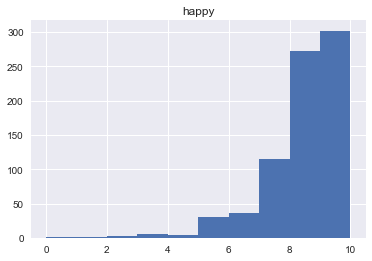

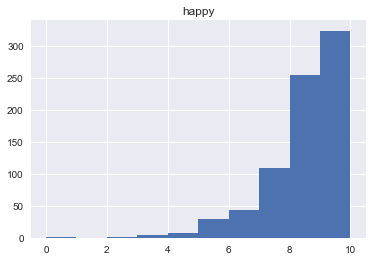

In [88]:
df[(df.year == 6) & (df.cntry=='CH')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='CH')][["happy"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FAC782E10>]],
      dtype=object)

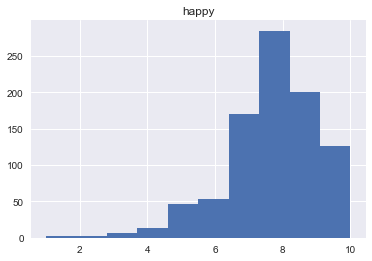

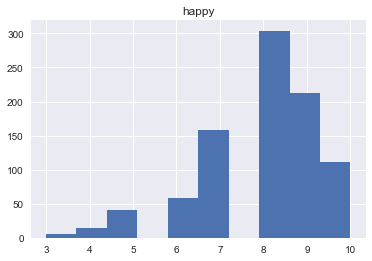

In [89]:
df[(df.year == 6) & (df.cntry=='SE')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='SE')][["happy"]].hist()

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Tried to set a label via parameter 'x' in func 'hist' but couldn't find such an argument.
(This is a programming error, please report to the Matplotlib list!)
  """Entry point for launching an IPython kernel.


TypeError: hist() missing 1 required positional argument: 'x'

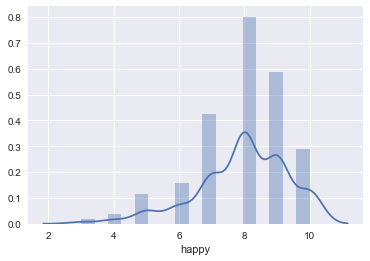

In [104]:
df[(df.year == 6) & (df.cntry=='SE')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='SE')][["happy"]].hist()

C:\Users\ezzan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Tried to set a label via parameter 'x' in func 'hist' but couldn't find such an argument.
(This is a programming error, please report to the Matplotlib list!)
  


TypeError: hist() missing 1 required positional argument: 'x'

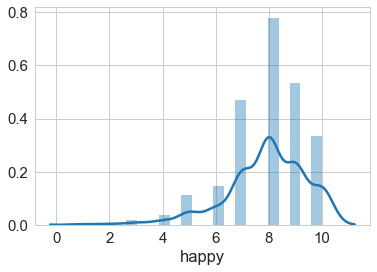

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FAC5F0CC0>]],
      dtype=object)

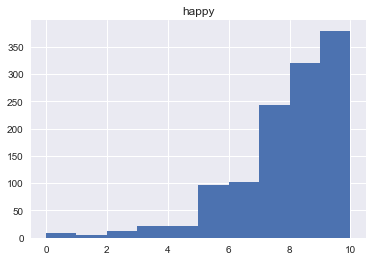

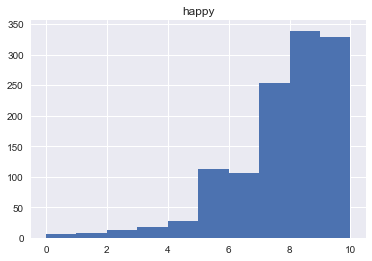

In [91]:
df[(df.year == 6) & (df.cntry=='ES')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='ES')][["happy"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FAC46BEB8>]],
      dtype=object)

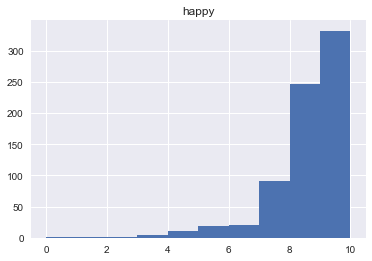

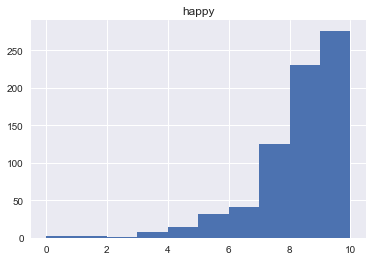

In [92]:
df[(df.year == 6) & (df.cntry=='NO')][["happy"]].hist()
df[(df.year == 7) & (df.cntry=='NO')][["happy"]].hist()

In [ ]:
plt.title('Histogram of Trust Scores, 2012')
df2012 = df2012.dropna()
sns.distplot(df2012['ppltrst'])
plt.show()